In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
# C1 - (1-1/(1+x)^n - C2*sum[1/(1+x) + 1/(1+x)^2)+ ... + 1/(1+x)^n]

In [3]:
def factory(order=1):
    @np.vectorize
    def wrapped(x, C1, C2):
        return C1 - (1 - 1/np.power(1 + x, order) - C2*np.sum([1/np.power(1 + x, i + 1) for i in range(order)]))
    return wrapped

In [4]:
f5 = factory(5)

In [5]:
x  = np.linspace(-20, 20, 2000)

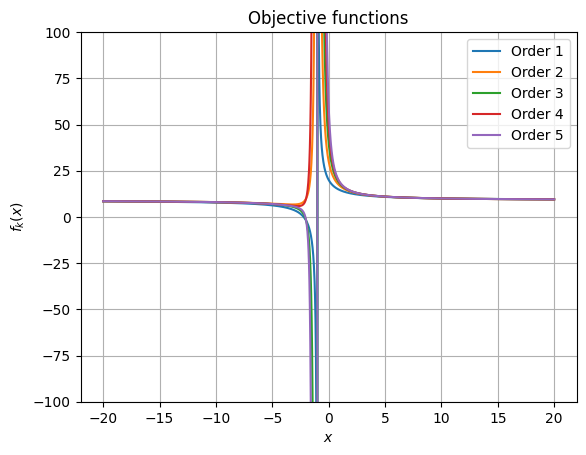

In [6]:
fig, axe = plt.subplots()
for order in range(1, 6):
    y = factory(order)(x, 10, 10)
    axe.plot(x, y, label="Order %d" % order)
axe.set_title("Objective functions")
axe.set_xlabel("$x$")
axe.set_ylabel("$f_k(x)$")
axe.set_ylim([-100, 100])
axe.grid()
axe.legend()

In [7]:
for order in range(1, 11):
    function = factory(order=order)
    solution = optimize.fsolve(function, x0=-2.1, args=(10, 10))
    print(order, solution)

1 [-2.22222222]
2 [-3.20176167]
3 [-2.10582151]
4 [-2.73423813]
5 [-2.06950043]
6 [-2.54187609]
7 [-2.0517491]
8 [-2.43340793]
9 [-2.04122279]
10 [-2.36505166]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
